# Linear Regression Model

In [2]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score


#### Description of the DATASET:
####  In the Diamond prices data set we are going to predict the price as traget by setting the feature of the various factors

### Reading the DataSet

In [3]:
df = pd.read_csv("Diamonds Prices2022.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.drop(['Unnamed: 0'], axis =1, inplace = True )

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Performing EDA

<Axes: xlabel='cut', ylabel='Count'>

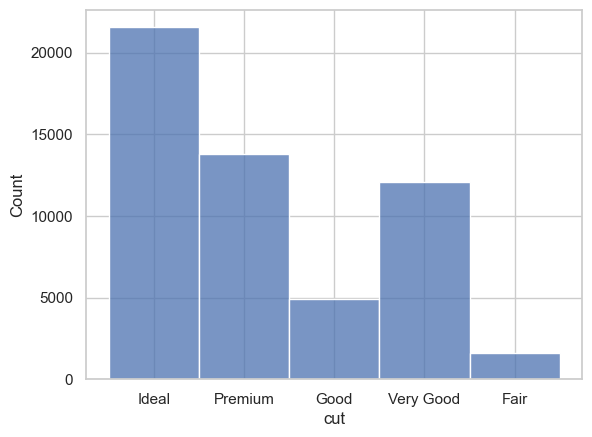

In [8]:
sns.set_theme(style="whitegrid")
sns.histplot(x = 'cut',data = df)

<Axes: xlabel='clarity', ylabel='Count'>

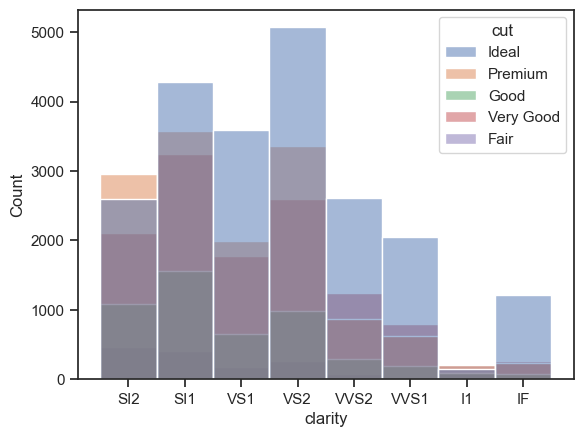

In [9]:
sns.set_theme(style = 'ticks')
sns.histplot(x = 'clarity', hue = 'cut', data = df)

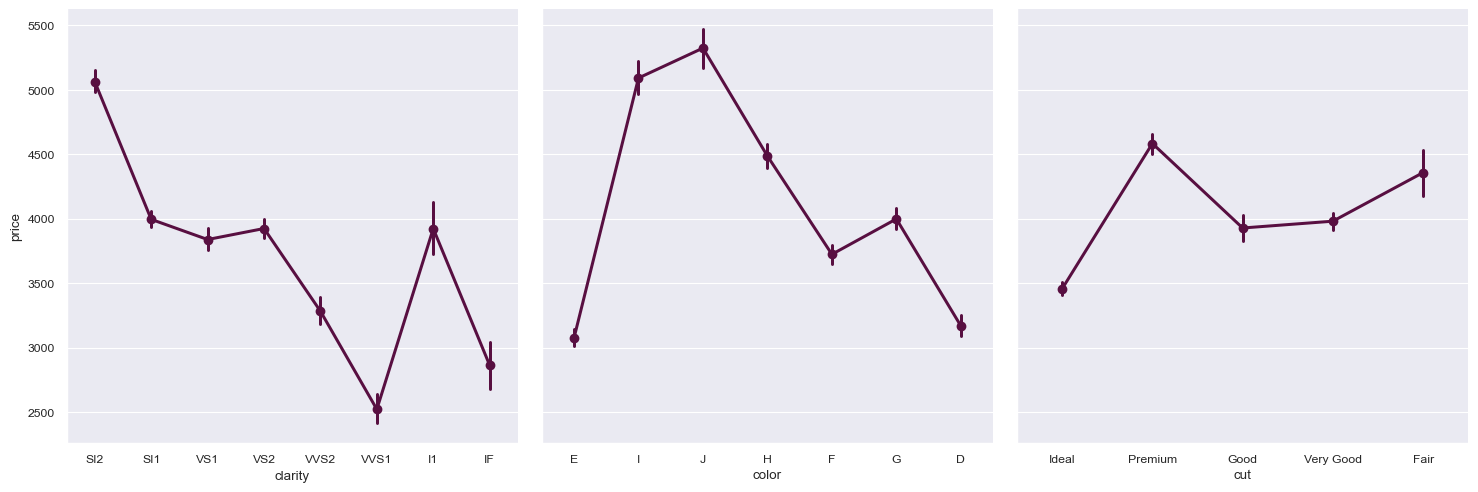

In [10]:
sns.set_theme('paper')
pair = sns.PairGrid(df, y_vars = 'price',x_vars = ['clarity','color','cut'], height = 5)
pair.map(sns.pointplot, color = "xkcd:plum")

#### In the above chart we can came to conclude each factors has the relation with the price

### Preprocessing the Data

In [11]:
## converting the lenght breath and height to volume for easy manipulation
df['volume'] = df.x*df.y*df.z

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
 10  volume   53943 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [13]:
## Droping the length breath and height since we dont need
df.drop(['x','y','z'], axis = 1, inplace = True)

In [14]:
df.describe()

,carat,depth,table,price,volume
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,129.848539
std,0.473999,1.432626,2.234549,3989.338447,78.243172
min,0.200000,43.000000,43.000000,326.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,114.808572
75%,1.040000,62.500000,59.000000,5324.000000,170.841804
max,5.010000,79.000000,95.000000,18823.000000,3840.598060


In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [16]:
### Label encoding the cut and clarity since they are not a numerical data

le_cut = LabelEncoder()
le_clarity = LabelEncoder()

In [17]:
df['cut'] = le_cut.fit_transform(df['cut'])
df['clarity'] = le_clarity.fit_transform(df['clarity'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int32  
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  int32  
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   volume   53943 non-null  float64
dtypes: float64(4), int32(2), int64(1), object(1)
memory usage: 2.9+ MB


In [19]:
### One hot encoding the color since the color dont have a numerical orders in it

encode = pd.get_dummies(df['color'], drop_first = True)
encode

,E,F,G,H,I,J
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
53938,False,False,False,True,False,False
53939,False,False,False,False,False,False
53940,True,False,False,False,False,False
53941,False,True,False,False,False,False


### concatinating the encoded data with the original dataframe

In [20]:
encoded_df = pd.concat([df,encode], axis = 1)

In [21]:
encoded_df.drop(['color'], axis = 1, inplace= True)

In [22]:
encoded_df.rename(columns = {'E':'Color_E', 'F':'Color_F','G':'Color_G','H':'Color_H','I':'Color_I', 'J':'Color_J'}, inplace = True)

In [23]:
encoded_df

,carat,cut,clarity,depth,table,price,volume,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.23,2,3,61.5,55.0,326,38.202030,True,False,False,False,False,False
1,0.21,3,2,59.8,61.0,326,34.505856,True,False,False,False,False,False
2,0.23,1,4,56.9,65.0,327,38.076885,True,False,False,False,False,False
3,0.29,3,5,62.4,58.0,334,46.724580,False,False,False,False,True,False
4,0.31,1,3,63.3,58.0,335,51.917250,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,3,61.0,58.0,2757,140.766120,False,False,False,True,False,False
53939,0.75,2,3,62.2,55.0,2757,124.568444,False,False,False,False,False,False
53940,0.71,3,2,60.5,55.0,2756,115.988754,True,False,False,False,False,False
53941,0.71,3,2,59.8,62.0,2756,112.813386,False,True,False,False,False,False


### Standardizing the numeric value using the MinMax Scaler

In [24]:
scaler = MinMaxScaler()

In [25]:
encoded_df['carat'] = scaler.fit_transform(encoded_df[['carat']])
encoded_df['cut'] = scaler.fit_transform(encoded_df[['cut']])
encoded_df['clarity'] = scaler.fit_transform(encoded_df[['clarity']])
encoded_df['depth'] = scaler.fit_transform(encoded_df[['depth']])
encoded_df['table'] = scaler.fit_transform(encoded_df[['table']])
encoded_df['price'] = scaler.fit_transform(encoded_df[['price']])
encoded_df['volume'] = scaler.fit_transform(encoded_df[['volume']])

In [26]:
encoded_df

,carat,cut,clarity,depth,table,price,volume,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.006237,0.50,0.428571,0.513889,0.230769,0.000000,0.009947,True,False,False,False,False,False
1,0.002079,0.75,0.285714,0.466667,0.346154,0.000000,0.008985,True,False,False,False,False,False
2,0.006237,0.25,0.571429,0.386111,0.423077,0.000054,0.009914,True,False,False,False,False,False
3,0.018711,0.75,0.714286,0.538889,0.288462,0.000433,0.012166,False,False,False,False,True,False
4,0.022869,0.25,0.428571,0.563889,0.288462,0.000487,0.013518,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.137214,0.75,0.428571,0.500000,0.288462,0.131427,0.036652,False,False,False,True,False,False
53939,0.114345,0.50,0.428571,0.533333,0.230769,0.131427,0.032435,False,False,False,False,False,False
53940,0.106029,0.75,0.285714,0.486111,0.230769,0.131373,0.030201,True,False,False,False,False,False
53941,0.106029,0.75,0.285714,0.466667,0.365385,0.131373,0.029374,False,True,False,False,False,False


### Training the Model by Train_test_split using the python spliting function

In [27]:
encoded_df = encoded_df.sample(frac = 1).reset_index(drop = True)

In [28]:
train_size = 0.8
spliting_index = int(train_size*len(encoded_df))

In [29]:
train_df = encoded_df[:spliting_index]
test_df = encoded_df[spliting_index:]

In [30]:
x_train = train_df.drop(['price'], axis = 1)
y_train = train_df['price']
x_test = test_df.drop(['price'], axis = 1)
y_test = test_df['price']

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_predict = model.predict(x_test)

## Checking The accuracy of the model using the Sklearn Metrics

In [34]:
mse = mean_squared_error(y_test, y_predict)
mse

0.00525848419517381

In [45]:
## means that approximately 88.96% of the variance in diamond prices is explained by the model. 
## This indicates a high level of accuracy and suggests that the model is performing well in capturing the relationship
## between the features and the target variable.
r2score = r2_score(y_test, y_predict)
r2score

0.8896288475422138

In [43]:
## This metrics represents the average absolute difference between the predicted prices and the actual prices in the standardized scale.
mae = mean_absolute_error(y_test,y_predict)
mae

0.04891466735114081

In [42]:
## this metrics represents the average absolute percentage difference between the predicted prices and the actual prices.
mape = mean_absolute_percentage_error(y_test, y_predict)
mape

0.9022581484912271

In [41]:
## the percentage of variance in the target variable is captured by  model.
explained_variance = explained_variance_score(y_test, y_predict)
explained_variance

0.8896307383040307

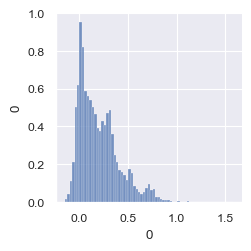

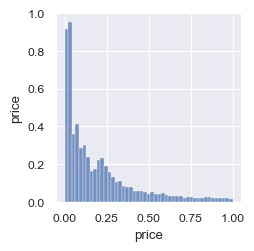

In [36]:
sns.pairplot(pd.DataFrame(y_predict))
sns.pairplot(pd.DataFrame(y_test))

<Axes: >

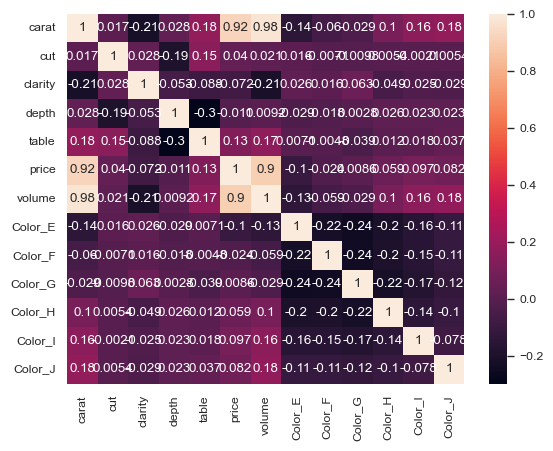

In [37]:
sns.heatmap(encoded_df.corr(), annot = True)

### With the above correlation matrix we can see the corelatoin between each variable is is fitted correctly

## In this Linear Regression Model we have predicted the prices of the diamond.